# L3: Image generation app 🎨

Load your HF API key and relevant Python libraries

In [1]:
from utils import *
import os
import io
import IPython.display
from PIL import Image
import base64 
import random
import time
import gradio as gr
import requests, json
from dotenv import load_dotenv, find_dotenv

# Get the base project path and data path
BASE_PATH = os.environ['BASE_PATH']
DATA_PATH = os.path.join(BASE_PATH, "data")

## Building an image generation app 

Here we are going to run `runwayml/stable-diffusion-v1-5` using the `🧨 diffusers` library.


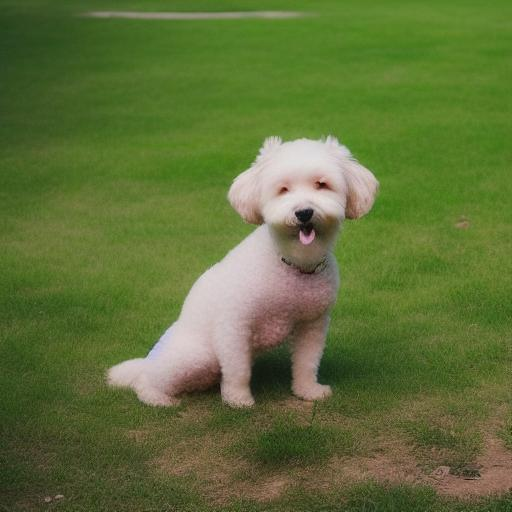

Saved as dog_in_park_1.jpg



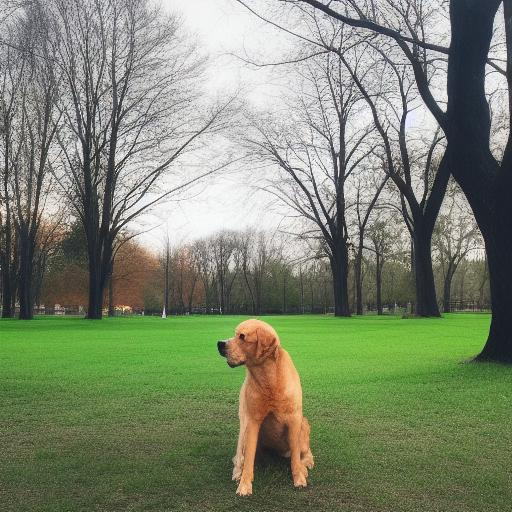

Saved as dog_in_park_2.jpg



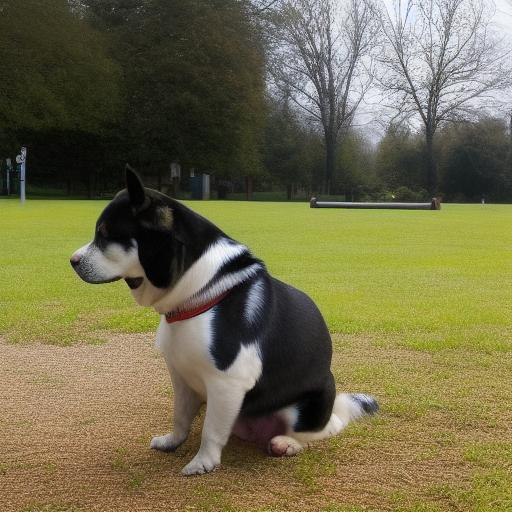

Saved as dog_in_park_3.jpg


In [2]:
# Generate a specific number of images
num_images = 3
prompt = "a dog in a park"

for _ in range(num_images):
    # Get next available filename
    filename = get_next_filename("dog_in_park", DATA_PATH)
    
    # Generate new image
    result = get_completion(prompt)
    if result:
        # Display the image
        display(IPython.display.HTML(f'<img src="data:image/jpeg;base64,{result}" />'))
        
        # Save the image
        image_data = base64.b64decode(result)
        with open(os.path.join(DATA_PATH, filename), "wb") as f:
            f.write(image_data)
        
        print(f"Saved as {filename}")
        
        # Wait to avoid rate limiting
        time.sleep(3)

In [3]:
# Test the function
prompt = "a crazy cat"
result = get_completion(prompt)

if result:
    display(IPython.display.HTML(f'<img src="data:image/jpeg;base64,{result}" />'))

Error: 429


In [4]:
# Testing the function with more parameters
prompt = "a dog in a park"

params = {
    "seed": random.randint(1, 1000000),  # Different seed = different image
    "negative_prompt": "blurry, low quality, white dog",  # Avoid these characteristics
    "num_inference_steps": 10,  # Faster generation but lower quality
    "guidance_scale": 7.5,  # Standard value for balanced results
    "width": 512,  # Standard width
    "height": 512  # Standard height
}
result = get_completion(prompt, params)
if result:
    display(IPython.display.HTML(f'<img src="data:image/jpeg;base64,{result}" />'))

Error: 429


## Generating with `gr.Interface()`

In [6]:
gr.close_all()
demo = gr.Interface(fn=generate,
                    inputs=[gr.Textbox(label="Your prompt")],
                    outputs=[gr.Image(label="Result")],
                    title="Image Generation with Stable Diffusion",
                    description="Generate any image with Stable Diffusion",
                    allow_flagging="never",
                    examples=["the spirit of a tamagotchi wandering in the city of Vienna","a mecha robot in a favela"])

demo.launch(share=True, server_port=int(os.environ['PORT1']))

Closing server running on port: 7860


c:\Users\usuar\AppData\Local\Programs\Python\Python312\Lib\site-packages\gradio\interface.py:399: UserWarning: The `allow_flagging` parameter in `Interface` is deprecated.Use `flagging_mode` instead.
  warnings.warn(


* Running on local URL:  http://127.0.0.1:7860
* Running on public URL: https://34a632dc057e669d22.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


In [7]:
demo.close()

Closing server running on port: 7860


## Building a more advanced interface

#### gr.Slider()
- You can set the `minimum`, `maximum`, and starting `value` for a `gr.Slider()`.
- If you want the slider to increment by integer values, you can set `step=1`.

In [8]:
gr.close_all()
demo = gr.Interface(fn=generate,
                    inputs=[
                        gr.Textbox(label="Your prompt"),
                        gr.Textbox(label="Negative prompt"),
                        gr.Slider(label="Inference Steps", minimum=1, maximum=100, value=25,
                                 info="In how many steps will the denoiser denoise the image?"),
                        gr.Slider(label="Guidance Scale", minimum=1, maximum=20, value=7, 
                                  info="Controls how much the text prompt influences the result"),
                        gr.Slider(label="Width", minimum=64, maximum=512, step=64, value=512),
                        gr.Slider(label="Height", minimum=64, maximum=512, step=64, value=512),
                    ],
                    outputs=[gr.Image(label="Result")],
                    title="Image Generation with Stable Diffusion",
                    description="Generate any image with Stable Diffusion",
                    allow_flagging="never"
                    )

demo.launch(share=True, server_port=int(os.environ['PORT2']))

Closing server running on port: 7860
Closing server running on port: 7860


c:\Users\usuar\AppData\Local\Programs\Python\Python312\Lib\site-packages\gradio\interface.py:399: UserWarning: The `allow_flagging` parameter in `Interface` is deprecated.Use `flagging_mode` instead.
  warnings.warn(


* Running on local URL:  http://127.0.0.1:7861
* Running on public URL: https://fd92aaf7b1476d09b8.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


In [9]:
demo.close()

Closing server running on port: 7861


## `gr.Blocks()`

- Within `gr.Blocks()`, you can define multiple `gr.Row()`s, or multiple `gr.Column()`s.
- Note that if the jupyter notebook is very narrow, the layout may change to better display the objects.  If you define two columns but don't see the two columns in the app, try expanding the width of your web browser, and the screen containing this jupyter notebook.

- When using `gr.Blocks()`, you'll need to explicitly define the "Submit" button using `gr.Button()`, whereas the 'Clear' and 'Submit' buttons are automatically added when using `gr.Interface()`.

In [10]:
with gr.Blocks() as demo:
    gr.Markdown("# Image Generation with Stable Diffusion")
    prompt = gr.Textbox(label="Your prompt")
    with gr.Row():
        with gr.Column():
            negative_prompt = gr.Textbox(label="Negative prompt")
            steps = gr.Slider(label="Inference Steps", minimum=1, maximum=100, value=25,
                      info="In many steps will the denoiser denoise the image?")
            guidance = gr.Slider(label="Guidance Scale", minimum=1, maximum=20, value=7,
                      info="Controls how much the text prompt influences the result")
            width = gr.Slider(label="Width", minimum=64, maximum=512, step=64, value=512)
            height = gr.Slider(label="Height", minimum=64, maximum=512, step=64, value=512)
            btn = gr.Button("Submit")
        with gr.Column():
            output = gr.Image(label="Result")

    btn.click(fn=generate, inputs=[prompt,negative_prompt,steps,guidance,width,height], outputs=[output])
gr.close_all()
demo.launch(share=True, server_port=int(os.environ['PORT3']))

Closing server running on port: 7860
Closing server running on port: 7860
Closing server running on port: 7861
* Running on local URL:  http://127.0.0.1:7862
* Running on public URL: https://429f90051e3111bd67.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


In [11]:
demo.close()

Closing server running on port: 7862


#### scale

- To choose how much relative width to give to each column, set the `scale` parameter of each `gr.Column()`.  
- If one column has `scale=4` and the second column has `scale=1`, then the first column takes up 4/5 of the total width, and the second column takes up 1/5 of the total width.

#### gr.Accordion()
- The `gr.Accordion()` can show/hide  the app options with a mouse click.
- Set `open=True` to show the contents of the Accordion by default, or `False` to hide it by default.

In [12]:
with gr.Blocks() as demo:
    gr.Markdown("# Image Generation with Stable Diffusion")
    with gr.Row():
        with gr.Column(scale=4):
            prompt = gr.Textbox(label="Your prompt") #Give prompt some real estate
        with gr.Column(scale=1, min_width=50):
            btn = gr.Button("Submit") #Submit button side by side!
    with gr.Accordion("Advanced options", open=False): #Let's hide the advanced options!
            negative_prompt = gr.Textbox(label="Negative prompt")
            with gr.Row():
                with gr.Column():
                    steps = gr.Slider(label="Inference Steps", minimum=1, maximum=100, value=25,
                      info="In many steps will the denoiser denoise the image?")
                    guidance = gr.Slider(label="Guidance Scale", minimum=1, maximum=20, value=7,
                      info="Controls how much the text prompt influences the result")
                with gr.Column():
                    width = gr.Slider(label="Width", minimum=64, maximum=512, step=64, value=512)
                    height = gr.Slider(label="Height", minimum=64, maximum=512, step=64, value=512)
    output = gr.Image(label="Result") #Move the output up too
            
    btn.click(fn=generate, inputs=[prompt,negative_prompt,steps,guidance,width,height], outputs=[output])

gr.close_all()
demo.launch(share=True, server_port=int(os.environ['PORT4']))

Closing server running on port: 7860
Closing server running on port: 7860
Closing server running on port: 7861
* Running on local URL:  http://127.0.0.1:7863
* Running on public URL: https://723c823226515616ff.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


In [ ]:
gr.close_all()